# Analisis base de casos

Con este analisis vemos la forma que tiene nuestra base de casos. Realizamos clustering de nuestros casos y vemos cuales se parecen más.
Además, realizamos estudio de usuarios presentes en nuestra base de casos. Analisis Univariante, y Bivariante con la ruta asignada para cada uno.

In [143]:
import pandas as pd

base_dades = pd.read_csv("C:/Users/FX517/OneDrive - Universitat Politècnica de Catalunya/Escritorio/UPC/5e Quatrimestre/SBC/PRACITCA 2/SBC_2/data/base_de_dades.csv")

In [3]:
base_dades.columns

Index(['visitante_id', 'visitant_edat', 'visitant_visites', 'visitant_dies',
       'visitant_hores', 'visitant_companyia', 'visitant_estudis',
       'visitant_coneixement', 'visitant_quizz', 'visitant_interessos_autor',
       'visitant_interessos_estils', 'ruta', 'ruta_quadres', 'ruta_temps',
       'puntuacio_ruta'],
      dtype='object')

In [4]:
base_dades.describe()

,visitante_id,visitant_edat,visitant_visites,visitant_dies,visitant_hores,visitant_coneixement,visitant_quizz,ruta_temps,puntuacio_ruta
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,248.733473,29.820567,1.043022,5.518363,4.493179,5.413431,3.271773,343.728353,2.602308
std,141.639523,16.452003,1.438967,2.871903,2.242683,2.933992,2.004357,3.564748,1.540175
min,0.000000,-24.000000,0.000000,1.000000,1.000000,1.000000,0.000000,337.120000,-1.000000
25%,122.000000,19.000000,0.000000,3.000000,3.000000,3.000000,2.000000,343.280000,2.000000
50%,249.000000,30.000000,0.000000,5.000000,4.000000,5.000000,3.000000,343.280000,2.000000
75%,365.000000,40.000000,2.000000,8.000000,6.000000,8.000000,5.000000,343.280000,4.000000
max,499.000000,84.000000,7.000000,10.000000,8.000000,10.000000,6.000000,351.680000,8.000000


In [9]:
base_dades.dtypes

visitante_id                    int64
visitant_edat                   int64
visitant_visites                int64
visitant_dies                   int64
visitant_hores                  int64
visitant_companyia             object
visitant_estudis                 bool
visitant_coneixement            int64
visitant_quizz                  int64
visitant_interessos_autor      object
visitant_interessos_estils     object
ruta                           object
ruta_quadres                   object
ruta_temps                    float64
puntuacio_ruta                  int64
dtype: object

In [144]:
num_cols = base_dades.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = base_dades.select_dtypes(include=['object', 'bool']).columns.to_list()

print('Numerical columns:\n', {col for col in num_cols})
print('\nCategorical columns:\n', {col for col in cat_cols})

Numerical columns:
 {'puntuacio_ruta', 'visitante_id', 'visitant_dies', 'visitant_visites', 'visitant_hores', 'visitant_quizz', 'ruta_temps', 'visitant_coneixement', 'visitant_edat'}

Categorical columns:
 {'ruta_quadres', 'visitant_interessos_estils', 'visitant_interessos_autor', 'visitant_companyia', 'ruta', 'visitant_estudis'}


In [145]:
# one hot encoding for categorical variables

categorical_variables = ['visitant_interessos_estils', 'visitant_interessos_autor',
                         'visitant_companyia', 'visitant_estudis']

interessos_autor = [
            "ignacio-pinazo-camarlench", "fillol-granell-antonio", "federico-de-madrazo",
            "diego-rodriguez-de-silva-y-velazquez", "tiziano-vecellio", "joaquin-sorolla",
            "fiodor-rokotov", "peter-paul-rubens", "rembrandt-van-rijn", "pieter-bruegel-el-vell",
            "j-m-w-turner", "leonardo-da-vinci", "rosa-bonheur", "winslow-homer",
            "edouard-vuillard", "charles-burchfield", "ben-shahn", "sandro-botticelli",
            "salvador-dali", "edvard-munch", "edouard-manet", "hieronymus-bosch",
            "johannes-vermeer", "eugene-delacroix", "not-sure"
        ]

interessos_estils = [
    "modernisme", "romanticisme", "barroc", "renaixement", "impressionisme",
         "realisme", "contemporani", "surrealisme", "expressionisme", "not-sure"
]

companyia = [
    "alone", "couple", "family", "group"
]


# Creem una columna binària per cada autor
for autor in interessos_autor:
    base_dades[f'autor_{autor}'] = base_dades['visitant_interessos_autor'].apply(lambda x: 1 if autor in x else 0)

# Creem una columna binària per cada estil
for estil in interessos_estils:
    base_dades[f'estil_{estil}'] = base_dades['visitant_interessos_estils'].apply(lambda x: 1 if estil in x else 0)

# Creem una columna binària per cada companyia
for comp in companyia:
    base_dades[f'companyia_{comp}'] = base_dades['visitant_companyia'].apply(lambda x: 1 if comp in x else 0)

# convertim la columna visitant_estudis a binaria
base_dades['visitant_estudis'] = base_dades['visitant_estudis'].apply(lambda x: 1 if x else 0)

base_dades = base_dades.drop(columns=['visitant_interessos_estils', 'visitant_interessos_autor', 'visitant_companyia'])

In [113]:
base_dades.columns

Index(['visitante_id', 'visitant_edat', 'visitant_visites', 'visitant_dies',
       'visitant_hores', 'visitant_estudis', 'visitant_coneixement',
       'visitant_quizz', 'ruta', 'ruta_quadres', 'ruta_temps',
       'puntuacio_ruta', 'autor_ignacio-pinazo-camarlench',
       'autor_fillol-granell-antonio', 'autor_federico-de-madrazo',
       'autor_diego-rodriguez-de-silva-y-velazquez', 'autor_tiziano-vecellio',
       'autor_joaquin-sorolla', 'autor_fiodor-rokotov',
       'autor_peter-paul-rubens', 'autor_rembrandt-van-rijn',
       'autor_pieter-bruegel-el-vell', 'autor_j-m-w-turner',
       'autor_leonardo-da-vinci', 'autor_rosa-bonheur', 'autor_winslow-homer',
       'autor_edouard-vuillard', 'autor_charles-burchfield', 'autor_ben-shahn',
       'autor_sandro-botticelli', 'autor_salvador-dali', 'autor_edvard-munch',
       'autor_edouard-manet', 'autor_hieronymus-bosch',
       'autor_johannes-vermeer', 'autor_eugene-delacroix', 'autor_not-sure',
       'estil_modernisme', 'estil_

In [146]:
# Normalitzem les dades numèriques
cols_to_compare = base_dades.select_dtypes(include=['int64']).columns.to_list()

# extreure las columnas puntuacio_ruta i visitant_id
cols_to_compare.remove('puntuacio_ruta')
cols_to_compare.remove('visitante_id')

base_dades_normalized = base_dades[cols_to_compare].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

print(base_dades_normalized.columns)
print(base_dades_normalized)

Index(['visitant_edat', 'visitant_visites', 'visitant_dies', 'visitant_hores',
       'visitant_estudis', 'visitant_coneixement', 'visitant_quizz',
       'autor_ignacio-pinazo-camarlench', 'autor_fillol-granell-antonio',
       'autor_federico-de-madrazo',
       'autor_diego-rodriguez-de-silva-y-velazquez', 'autor_tiziano-vecellio',
       'autor_joaquin-sorolla', 'autor_fiodor-rokotov',
       'autor_peter-paul-rubens', 'autor_rembrandt-van-rijn',
       'autor_pieter-bruegel-el-vell', 'autor_j-m-w-turner',
       'autor_leonardo-da-vinci', 'autor_rosa-bonheur', 'autor_winslow-homer',
       'autor_edouard-vuillard', 'autor_charles-burchfield', 'autor_ben-shahn',
       'autor_sandro-botticelli', 'autor_salvador-dali', 'autor_edvard-munch',
       'autor_edouard-manet', 'autor_hieronymus-bosch',
       'autor_johannes-vermeer', 'autor_eugene-delacroix', 'autor_not-sure',
       'estil_modernisme', 'estil_romanticisme', 'estil_barroc',
       'estil_renaixement', 'estil_impressionism

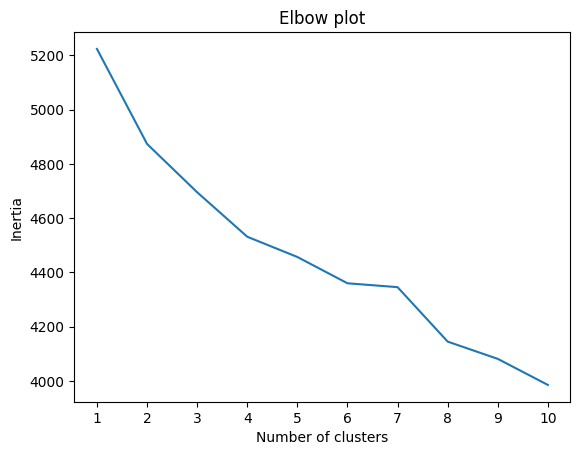

In [147]:
# fem clustering amb KMeans, abans de decidir el número de clusters, hem de fer un elbow plot
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(base_dades_normalized)
    inertia.append(kmeans.inertia_)

# mostrem en l'eix de les x el num de clusters de 1 a 10 de 1 en 1
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.xticks(range(1, 11))
plt.ylabel('Inertia')
plt.title('Elbow plot')
plt.show()



In [ ]:
# ens quedem amb 5 clusters, fem el clustering i ens quedem amb la representació de cada cluster
kmeans = KMeans(n_clusters=5, random_state=42)
base_dades['cluster'] = kmeans.fit_predict(base_dades_normalized)
base_dades_normalized['cluster'] = base_dades['cluster']

# Calculem la representació (mitjanes) de cada cluster
representacio_clusters = base_dades.groupby('cluster')

# guardem la representació de cada cluster en un diccionari
clusters_representation = {}
for cluster, data in base_dades.groupby('cluster'):
    clusters_representation[cluster] = {}
    for col in cols_to_compare:
        clusters_representation[cluster][col] = data[col].mean()

# guardem la representació de cada cluster en un dataframe
clusters_representation_df = pd.DataFrame(clusters_representation)


In [149]:
display(clusters_representation_df)

,0,1,2,3,4
visitant_edat,42.222222,44.641975,40.102767,43.196203,41.103286
visitant_visites,1.123016,1.154321,1.335968,1.006329,1.295775
visitant_dies,5.436508,5.401235,5.446640,5.689873,5.568075
visitant_hores,4.361111,4.716049,4.636364,4.354430,4.521127
visitant_estudis,0.543651,0.425926,0.557312,0.626582,0.539906
visitant_coneixement,5.317460,5.123457,5.181818,5.867089,5.403756
visitant_quizz,3.301587,3.376543,3.450593,3.670886,3.403756
autor_ignacio-pinazo-camarlench,0.063492,0.092593,0.086957,0.082278,0.079812
autor_fillol-granell-antonio,0.095238,0.043210,0.110672,0.107595,0.079812
autor_federico-de-madrazo,0.107143,0.104938,0.138340,0.101266,0.122066


In [150]:
# guardar base de dades normalitzada
base_dades_normalized.to_csv('C:/Users/FX517/OneDrive - Universitat Politècnica de Catalunya/Escritorio/UPC/5e Quatrimestre/SBC/PRACITCA 2/SBC_2/data/base_de_dades_normalized.csv', index=False)

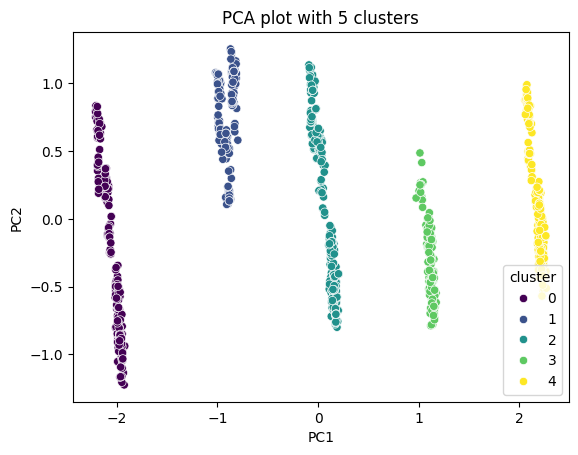

In [151]:
# visualitzem els clusters amb PCA
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca.fit(base_dades_normalized)

base_dades_pca = pca.transform(base_dades_normalized)
base_dades_pca = pd.DataFrame(base_dades_pca, columns=['PC1', 'PC2'])
base_dades_pca['cluster'] = kmeans.labels_

sns.scatterplot(data=base_dades_pca, x='PC1', y='PC2', hue='cluster', palette='viridis')
plt.title('PCA plot with 5 clusters')
plt.show()


## Generació Edat Visitants

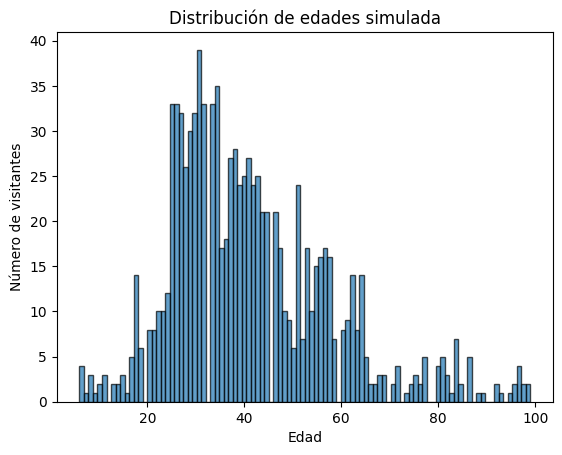

In [142]:
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
import random

import numpy as np

# Rangs d'edat i pesos de la distribució segons les dades
age_ranges = [(6, 17), (18, 24), (25, 34), (35, 44), (45, 54), (55, 64), (65, 99)]
data = [
    3.0,  # Menors (6-17 anys), ajustat per afegir-los al total
    8.317,  # 18-24
    41.148,  # 25-34
    29.914,  # 35-44
    17.254,  # 45-54
    14.571,  # 55-64
    10.301   # 65+
]

# Normalització dels pesos
weights_normalized = np.array(data) / np.sum(data)

# Funció per generar una edat aleatòria segons el rang seleccionat
def generate_age():
    selected_range = np.random.choice(len(age_ranges), p=weights_normalized)
    age = np.random.randint(age_ranges[selected_range][0], age_ranges[selected_range][1] + 1)
    return age

# Generar 1000 edats com a exemple
ages = [generate_age() for _ in range(1000)]


# Visualiza la distribución
plt.hist(ages, bins=100, edgecolor='black', alpha=0.7)
plt.xlabel('Edad')
plt.ylabel('Número de visitantes')
plt.title('Distribución de edades simulada')
plt.show()
